In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
import numpy as np
import pandas as pd
df = pd.read_csv('lung cancer survey.csv')
df_no_na = df.dropna()

df_age = df_no_na[df_no_na["AGE"] > 21]
# Use df_age for all models, where clustering algorithm models, such as Kmeans, randomforest, decision tree as they would have already categorise an age threshold within the model
df_age

# Use df_cluster only for logistic regression, lasso, ridge and elastic net - cross comparison of these models with df_age
df_cluster = df_age.copy()
df_cluster['cluster'] = df_cluster['AGE'].apply(lambda x: 1 if x >= 61 else 0)
df_cluster = df_cluster.drop("AGE", axis = 1)
df_cluster

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.0,61.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,59.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,54.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,0.0,54.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,1.0,62.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8997,0.0,71.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
8998,1.0,63.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8999,1.0,70.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,cluster
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
8997,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1
8998,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
8999,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1


In [7]:
# Cost complexity pruning, find the best alpha 
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_text

X = df_age.drop('LUNG_CANCER', axis=1)  # Drop the target column to get the features
y = df_age['LUNG_CANCER']  # Extract the target column

# Step 1: Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=888
)

# Step 2 & 3: Get a sequence of subtrees
# Define your Decision Tree
model_tree = DecisionTreeClassifier(criterion='entropy', random_state=888)

# Use cost complexity pruning and get sequence of alphas
path = model_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # effective alphas of each subtree

# Define the Decision Tree for each alpha
trees = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 888, ccp_alpha = ccp_alpha)
    trees.append(clf)

# Step 4: Use K-fold cross-validation to choose the best alpha
kf = KFold(n_splits=10, shuffle=True, random_state=888)
mean_cv_errors = []

for clf in trees:
    # Perform cross-validation and get the average error for each alpha
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')
    mean_cv_errors.append(np.mean(cv_scores))  # Get average accuracy for each alpha

# Step 5: Find the optimal alpha (the one that maximizes the cross-validated accuracy)
optimal_alpha_index = np.argmax(mean_cv_errors)
optimal_alpha = ccp_alphas[optimal_alpha_index]
print(f"Optimal alpha: {optimal_alpha}")

# Step 6: Prune the tree using the optimal alpha on the training set
pruned_tree = DecisionTreeClassifier(criterion='entropy', random_state=888, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)

# Step 7: Evaluate the pruned tree on the validation set
y_pred_pruned = pruned_tree.predict(X_val)
print(f"Accuracy with pruning: {accuracy_score(y_val, y_pred_pruned):.4f}")
print(f"Precision with pruning: {precision_score(y_val, y_pred_pruned):.4f}")
print(f"Recall with pruning: {recall_score(y_val, y_pred_pruned):.4f}")
print(f"F1-Score with pruning: {f1_score(y_val, y_pred_pruned):.4f}")

Optimal alpha: 0.000805279635025675


DecisionTreeClassifier(ccp_alpha=0.000805279635025675, criterion='entropy',
                       random_state=888)

Accuracy with pruning: 0.8728
Precision with pruning: 0.8697
Recall with pruning: 0.9881
F1-Score with pruning: 0.9251


In [9]:
# NO PAIRWISE AND GRIDSEARCH
from sklearn.ensemble import RandomForestClassifier

X = df_age.drop('LUNG_CANCER', axis=1)  # Drop the target column to get the features
y = df_age['LUNG_CANCER']  # Extract the target column

# Step 1: Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=888
)

# Initialize the model (Note: Bagging is a special case of RF when m = p) & max_features = 1 (by default, meaning all features considered)
Bagging_classifier = RandomForestClassifier(n_estimators = 100, random_state = 888, criterion = 'entropy',) 

# Train the model on the training data
Bagging_classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_bagging = Bagging_classifier.predict(X_val)

# Display the results
print(f"Accuracy: {accuracy_score(y_val, y_pred_pruned):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_pruned):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_pruned):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_bagging):.4f}")

# Should we do a 70-30% Spilt for training n test? Does it affect the results?

RandomForestClassifier(criterion='entropy', random_state=888)

Accuracy: 0.8728
Precision: 0.8697
Recall: 0.9881
F1 Score: 0.9244


In [11]:
# NO PAIRWISE & With GridSearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df_age.drop('LUNG_CANCER', axis=1)  # Drop the target column to get the features
y = df_age['LUNG_CANCER']  # Extract the target column

# Step 1: Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=888
)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
Bagging_classifier = RandomForestClassifier(random_state=888, criterion='entropy')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Bagging_classifier, param_grid=param_grid, 
                           scoring='f1', cv=5, n_jobs=-1, verbose=2)

# Train the model on the training data
grid_search.fit(X_train, y_train)

# Make predictions on the validation data using the best estimator
y_pred_bagging = grid_search.best_estimator_.predict(X_val)

# Display the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_val, y_pred_bagging):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_bagging):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_bagging):.4f}")
print(f"Bagging F1 Score: {f1_score(y_val, y_pred_bagging):.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=888),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=2)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8828
Precision: 0.8752
Recall: 0.9944
Bagging F1 Score: 0.9310


Optimal Number of Trees: 196


RandomForestClassifier(criterion='entropy', n_estimators=196, random_state=888)

Corresponding Accuracy Score: 0.8733
Corresponding Precision Score: 0.9797
Corresponding Recall Score: 0.8758
Corresponding F1 Score: 0.9249


<BarContainer object of 15 artists>

Text(0, 0.5, 'Feature Importance')

Text(0.5, 1.0, 'Feature Importance in Random Forest')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'AGE'),
  Text(1, 0, 'YELLOW_FINGERS'),
  Text(2, 0, 'ALCOHOL CONSUMING'),
  Text(3, 0, 'GENDER'),
  Text(4, 0, 'WHEEZING'),
  Text(5, 0, 'SWALLOWING DIFFICULTY'),
  Text(6, 0, 'ALLERGY '),
  Text(7, 0, 'SMOKING'),
  Text(8, 0, 'CHEST PAIN'),
  Text(9, 0, 'SHORTNESS OF BREATH'),
  Text(10, 0, 'COUGHING'),
  Text(11, 0, 'FATIGUE '),
  Text(12, 0, 'CHRONIC DISEASE'),
  Text(13, 0, 'ANXIETY'),
  Text(14, 0, 'PEER_PRESSURE')])

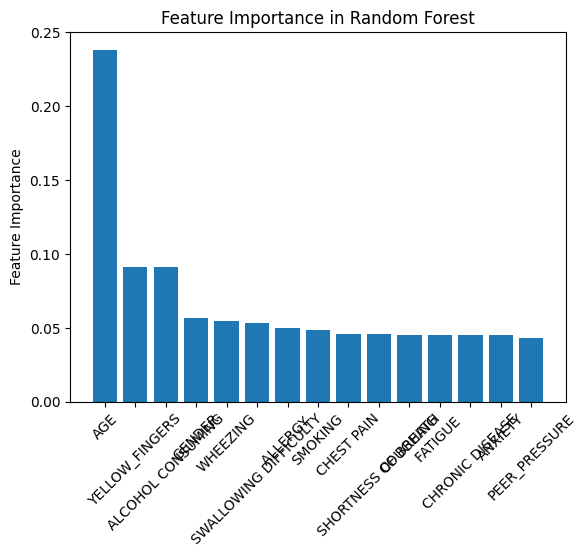

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

forests  = []
number_of_trees = range(50, 201)
for i in number_of_trees:
    random_forest = RandomForestClassifier(n_estimators = i, random_state = 888, criterion = "entropy")
    forests.append(random_forest)

kf = KFold(n_splits = 10, shuffle = True, random_state = 888)
mean_cv_errors = []

for rf in forests:
    cv_scores = cross_val_score(rf, X_train, y_train, cv = kf, scoring = 'precision')
    mean_cv_errors.append(np.mean(cv_scores))  

optimal_number_of_trees_index = np.argmax(mean_cv_errors)
optimal_number_of_trees = number_of_trees[optimal_number_of_trees_index]
print(f"Optimal Number of Trees: {optimal_number_of_trees}")

new_forest = RandomForestClassifier(n_estimators = optimal_number_of_trees, random_state = 888, max_features = "sqrt", criterion = "entropy")
new_forest.fit(X_train, y_train)
y_pred = new_forest.predict(X_val)

print(f"Corresponding Accuracy Score: {accuracy_score(y_pred, y_val):.4f}")
print(f"Corresponding Precision Score: {precision_score(y_pred, y_val):.4f}")
print(f"Corresponding Recall Score: {recall_score(y_pred, y_val):.4f}")
print(f"Corresponding F1 Score: {f1_score(y_pred, y_val):.4f}")

feature_importances = new_forest.feature_importances_
feature_names = df_age.columns.drop(["LUNG_CANCER"])
# Do a reverse sorted vertical bar plot
indices = np.argsort(feature_importances)[::-1]           # [::-1] reverses the order
plt.bar(np.array(feature_names)[indices], feature_importances[indices])
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=45)                                   # otherwist xticks is overcrowded with text
plt.show()

In [13]:
# CAN IGNORE - idt the pruned tree shld be used in conjunction with bagging or RF
# with ccp_alpha
# from sklearn.ensemble import RandomForestClassifier

# # Initialize the model (Note: Bagging is a special case of RF when m = p)
# Bagging_classifier = RandomForestClassifier(n_estimators = 100, random_state = 888, criterion = 'entropy', ccp_alpha=ccp_alpha) # max_features = None (by default)

# # Train the model on the training data
# Bagging_classifier.fit(X_train, y_train)

# # Make predictions on the validation data
# y_pred_bagging = Bagging_classifier.predict(X_val)

# # Display the results
# print(f"Accuracy with pruning: {accuracy_score(y_val, y_pred_pruned):.4f}")
# print(f"Precision with pruning: {precision_score(y_val, y_pred_pruned):.4f}")
# print(f"Recall with pruning: {recall_score(y_val, y_pred_pruned):.4f}")
# print(f"Bagging Validation F1 Score: {f1_score(y_val, y_pred_bagging):.4f}")

RandomForestClassifier(ccp_alpha=0.04281946918347629, criterion='entropy',
                       random_state=42)

Accuracy with pruning: 0.8728
Precision with pruning: 0.8697
Recall with pruning: 0.9881
Bagging Validation F1 Score: 0.8861


In [15]:
? RandomForestClassifier

Init signature:
 RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

## Pairwise features included 

In [9]:
import pandas as pd
from itertools import product

feature_names = [col for col in df_cluster.columns if col != "LUNG_CANCER"]

df_pairwise = df_cluster.copy()
# Generate all combinations of interaction terms for these features
for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        new_column_name = f'{feature_names[i]}_{feature_names[j]}'
        df_pairwise[new_column_name] = df_pairwise[feature_names[i]] * df_pairwise[feature_names[j]]

print(df_pairwise)

      GENDER  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        0.0      0.0             0.0      1.0            1.0   
1        1.0      1.0             1.0      0.0            0.0   
2        1.0      0.0             0.0      0.0            0.0   
3        1.0      0.0             0.0      0.0            1.0   
4        0.0      1.0             0.0      0.0            1.0   
...      ...      ...             ...      ...            ...   
8996     1.0      0.0             1.0      1.0            1.0   
8997     0.0      1.0             1.0      1.0            0.0   
8998     1.0      1.0             0.0      0.0            1.0   
8999     1.0      1.0             1.0      0.0            0.0   
9099     1.0      0.0             0.0      0.0            1.0   

      CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  ...  \
0                 0.0       1.0       0.0       0.0                0.0  ...   
1                 1.0       0.0       1.0       1.0          

/var/folders/zc/ndwggq2s3zd3s1nyr9lx395m0000gn/T/ipykernel_62241/92817673.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pairwise[new_column_name] = df_pairwise[feature_names[i]] * df_pairwise[feature_names[j]]
/var/folders/zc/ndwggq2s3zd3s1nyr9lx395m0000gn/T/ipykernel_62241/92817673.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pairwise[new_column_name] = df_pairwise[feature_names[i]] * df_pairwise[feature_names[j]]
/var/folders/zc/ndwggq2s3zd3s1nyr9lx395m0000gn/T/ipykernel_62241/92817673.py:11: PerformanceWa

In [13]:
# Cost complexity pruning, find the best alpha , w Pairwise
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_text

y = df_pairwise['LUNG_CANCER'].values
X = df_pairwise.drop("LUNG_CANCER", axis = 1).values

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=888)

# Get a sequence of subtrees
# Define your Decision Tree
model_tree = DecisionTreeClassifier(criterion='entropy', random_state=888)

# Use cost complexity pruning and get sequence of alphas
path = model_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # effective alphas of each subtree

# Define the Decision Tree for each alpha
trees = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 888, ccp_alpha = ccp_alpha)
    trees.append(clf)

# Use K-fold cross-validation to choose the best alpha
kf = KFold(n_splits=10, shuffle=True, random_state=888)
mean_cv_errors = []

for clf in trees:
    # Perform cross-validation and get the average error for each alpha
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')
    mean_cv_errors.append(np.mean(cv_scores))  # Get average accuracy for each alpha

# Find the optimal alpha (the one that maximizes the cross-validated accuracy)
optimal_alpha_index = np.argmax(mean_cv_errors)
optimal_alpha = ccp_alphas[optimal_alpha_index]
print(f"Optimal alpha: {optimal_alpha}")

# Prune the tree using the optimal alpha on the training set
pruned_tree = DecisionTreeClassifier(criterion='entropy', random_state=888, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)

# Evaluate the pruned tree on the validation set
y_pred_pruned = pruned_tree.predict(X_val)
print(f"Accuracy with pruning: {accuracy_score(y_val, y_pred_pruned):.4f}")
print(f"Precision with pruning: {precision_score(y_val, y_pred_pruned):.4f}")
print(f"Recall with pruning: {recall_score(y_val, y_pred_pruned):.4f}")
print(f"F1-Score with pruning: {f1_score(y_val, y_pred_pruned):.4f}")

Optimal alpha: 0.0007966956886362852


DecisionTreeClassifier(ccp_alpha=0.0007966956886362852, criterion='entropy',
                       random_state=888)

Accuracy with pruning: 0.8767
Precision with pruning: 0.8735
Recall with pruning: 0.9881
F1-Score with pruning: 0.9273


In [17]:
# With PAIRWISE, NO GRIDSEARCH
from sklearn.ensemble import RandomForestClassifier

y = df_pairwise['LUNG_CANCER'].values
X = df_pairwise.drop("LUNG_CANCER", axis = 1).values

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=888)

# Initialize the model (Note: Bagging is a special case of RF when m = p) & max_features = 1 (by default, meaning all features considered)
Bagging_classifier = RandomForestClassifier(n_estimators = 100, random_state = 888, criterion = 'entropy',) 

# Train the model on the training data
Bagging_classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_bagging = Bagging_classifier.predict(X_val)

# Display the results
print(f"Accuracy: {accuracy_score(y_val, y_pred_bagging):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_bagging):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_bagging):.4f}")
print(f"Bagging: {f1_score(y_val, y_pred_bagging):.4f}")

RandomForestClassifier(criterion='entropy', random_state=888)

Accuracy: 0.8594
Precision: 0.8786
Recall: 0.9553
Bagging: 0.9154


In [33]:
# With GridSearch & PAIRWISE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y = df_pairwise['LUNG_CANCER'].values
X = df_pairwise.drop("LUNG_CANCER", axis = 1).values

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=888)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
Bagging_classifier = RandomForestClassifier(random_state=888, criterion='entropy')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Bagging_classifier, param_grid=param_grid, 
                           scoring='f1', cv=5, n_jobs=-1, verbose=2)

# Train the model on the training data
grid_search.fit(X_train, y_train)

# Make predictions on the validation data using the best estimator
y_pred_bagging = grid_search.best_estimator_.predict(X_val)

# Display the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_val, y_pred_bagging):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_bagging):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_bagging):.4f}")
print(f"Bagging F1 Score: {f1_score(y_val, y_pred_bagging):.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=888),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=2)

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.8811
Precision: 0.8745
Recall: 0.9930
Bagging F1 Score: 0.9300


In [47]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Set seeds for reproducibility
random.seed(888)
tf.random.set_seed(888)
np.random.seed(888)

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(15,)),  # Adjust input shape based on feature count
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.5)
# Compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2000, batch_size=len(X_train), verbose=0)

# Evaluate model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
                
# Get predicted probabilities and convert to binary predictions
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)
# Calculate precision, recall, and F1-score
precision = precision_score(y_val, y_pred, zero_division=0)
recall = recall_score(y_val, y_pred, zero_division=0)
f1 = f1_score(y_val, y_pred, zero_division=0)

# Display metrics for this iteration
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
Validation Loss: 0.5069, Validation Accuracy: 0.7956
Precision: 0.7956, Recall: 1.0000, F1 Score: 0.8861


In [17]:
# Set seeds for reproducibility
import random
import tensorflow as tf
import numpy as np


random.seed(888)
tf.random.set_seed(888)
np.random.seed(888)

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(15,)),  # Adjust input shape based on feature count
    tf.keras.layers.Dense(8, activation='linear'),
    tf.keras.layers.Dense(23, activation='relu'),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.026526058661021926)
# Compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000, batch_size=len(X_train), verbose=1)

# Evaluate model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
                
# Get predicted probabilities and convert to binary predictions
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)
# Calculate precision, recall, and F1-score
precision = precision_score(y_val, y_pred, zero_division=0)
recall = recall_score(y_val, y_pred, zero_division=0)
f1 = f1_score(y_val, y_pred, zero_division=0)

# Display metrics for this iteration
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.1926 - loss: 0.7220
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8074 - loss: 0.5288
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8074 - loss: 0.4998
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8074 - loss: 0.4932
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8074 - loss: 0.4903
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8074 - loss: 0.4935
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8074 - loss: 0.4913
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8074 - loss: 0.4915
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8074 - loss: 0.4921
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8074 - loss: 0.4926
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8074 - loss: 0.4928
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy:

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
Validation Loss: 0.5069, Validation Accuracy: 0.7956
Precision: 0.7956, Recall: 1.0000, F1 Score: 0.8861
